# Analise_Uvas

Aluno: mig
Descrição: Versão refatorada para estudo — nomes padronizados e comentários ajustados.



In [66]:
# Lib de Padronização
from sklearn.preprocessing import StandardScaler

In [67]:
# BibliotecaLib de Normalização
from sklearn.preprocessing import MinMaxScaler

In [68]:
# Lib Treino e teste
from sklearn.model_selection import train_test_split

In [69]:
# Lib acuracia
from sklearn.metrics import accuracy_score

In [70]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [71]:
# SVM
from sklearn import svm

In [72]:
from sklearn.svm import SVC

In [73]:
# Carregar arquivo
import pandas as pd
df_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')

In [74]:
# Renomeando colunas
df_original.columns = ['CLASS', 'ALCOHOL', 'MALICACID', 'ASH', 'ASHALCALINITY', 'MAGNESIUM', 'TOTALPHENOLS','FLAVNOIDS',
                       'PHENOLS', 'PRONTHOCYANINS', 'COLORINTENSITY', 'HUE', 'OD280/OD315', 'PROLINE']

In [75]:
df_original

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVNOIDS,PHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280/OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [76]:
df_original.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVNOIDS,PHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280/OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [77]:
df_original.isna().sum()

,0
CLASS,0
ALCOHOL,0
MALICACID,0
ASH,0
ASHALCALINITY,0
MAGNESIUM,0
TOTALPHENOLS,0
FLAVNOIDS,0
PHENOLS,0
PRONTHOCYANINS,0


<Axes: >

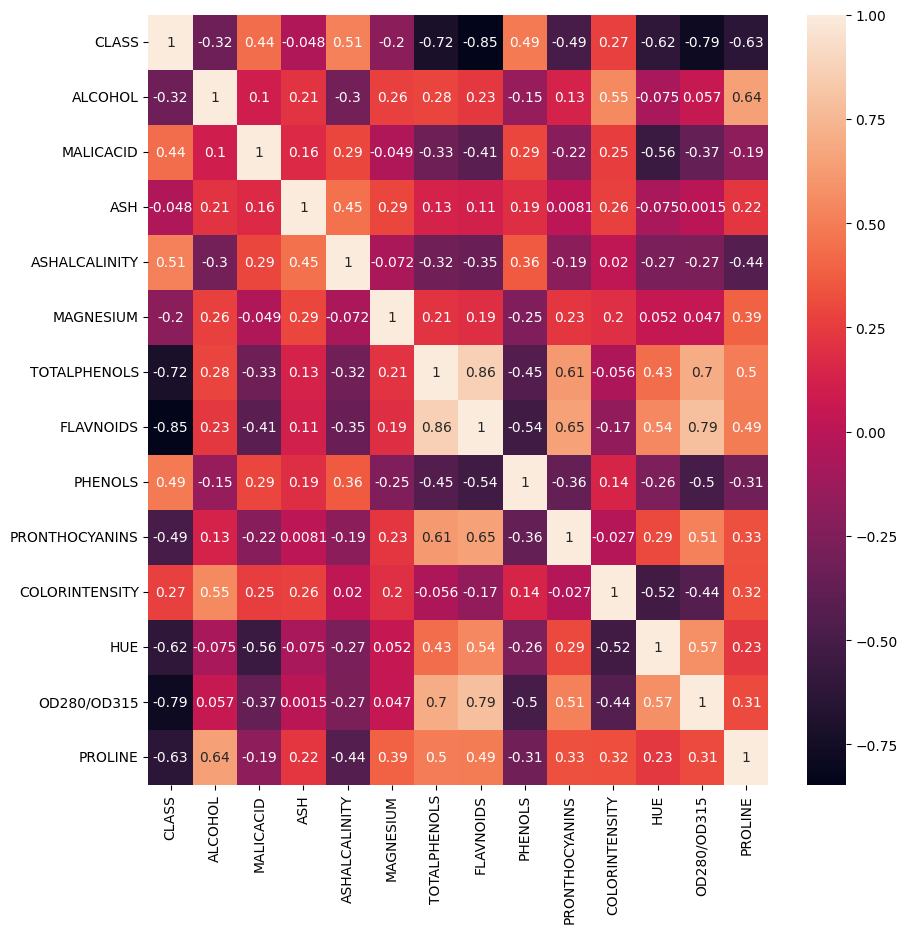

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df_original.corr(), annot=True)

In [79]:
# Obj padronizado
obj_padronizado = StandardScaler().fit(df_original)

In [80]:
df_padronizado = obj_padronizado.transform(df_original)

In [81]:
df_padronizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [82]:
# Obj normalizado
obj_normalizado = MinMaxScaler().fit(df_original)

In [83]:
df_normalizado = obj_padronizado.transform(df_original)

In [84]:
df_normalizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [85]:
VAR_TARGET = df_original['CLASS']

In [86]:
VAR_TARGET

,CLASS
0,1
1,1
2,1
3,1
4,1
...,...
172,3
173,3
174,3
175,3


In [87]:
from sklearn.model_selection import train_test_split
VAR_PREDITORAS_ORIG = df_original.drop(['CLASS'], axis=1)

In [88]:
test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size=0.3, random_state=42)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(VAR_PREDITORAS_ORIG, VAR_TARGET, test_size=0.3, random_state=42)

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
resultado = knn.predict(X_test)

In [92]:
score = accuracy_score(y_test, resultado)
print(score)

0.6481481481481481


In [93]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [94]:
resultadoSVM = svm.predict(X_test)
score_SVM = accuracy_score(y_test, resultadoSVM)
print(score_SVM)

0.9444444444444444


In [95]:
df_normalizado

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

In [96]:

df_normalizado. coluans = ['CLASS', 'ALCOHOL', 'MALICACID', 'ASH', 'ASHALCALINITY', 'MAGNESIUM', 'TOTALPHENOLS','FLAVNOIDS',
                       'PHENOLS', 'PRONTHOCYANINS', 'COLORINTENSITY', 'HUE', 'OD280/OD315', 'PROLINE']

AttributeError: 'numpy.ndarray' object has no attribute 'coluans'